In [113]:
import spacy
import pandas as pd

import json
import spacy
import requests
import random
import time

import spacy
import tqdm
from collections import Counter

import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

import pyLDAvis
import pyLDAvis.gensim

In [114]:
df = pd.read_csv("C:/Users/ASUS/Desktop/SciencesPo/Social Media Analysis/final_dataframe_4790_articles.csv")
nlp = spacy.load("en_core_web_sm")

In [115]:
df['combined_text'] = df['headline'] + ' ' + df['lead_paragraph']
df['combined_text'] = df['combined_text'].astype(str)
texts = df['combined_text'].tolist()

In [116]:
def extract_persons(text):
    doc = nlp(text)
    persons = [ent.text.lower() for ent in doc.ents if ent.label_ == "PERSON"]
    return persons

In [117]:
texts_with_dates = df[['combined_text', 'date']]

In [118]:
excluded_year = 2021
# we excluded year 2021 because this year is not entirely covered in the corpus and is connected to the Biden presidency

In [119]:
name_mapping = {
    'trump': 'Donald Trump',
    'donald j. trump': 'Donald Trump',
    'donald trump': 'Donald Trump',
    'donald j. trump’s': 'Donald Trump',
    'hillary clinton': 'Hillary Clinton',
    'hillary rodham clinton': 'Hillary Clinton',
    'clinton': 'Hillary Clinton',
    'obama': 'Barack Obama',
    'barack obama': 'Barack Obama',
    'joe biden': 'Joe Biden',
    'biden': 'Joe Biden',
    'joseph r. biden jr.': 'Joe Biden',
    'rex w. tillerson': 'Rex Tillerson',
    'rex tillerson': 'Rex Tillerson'
    # Add more names and variations as needed
}

In [120]:
data_with_dates = texts_with_dates.to_dict(orient='records')

In [121]:
persons_by_year = {}

In [122]:
for article in data_with_dates:
    text = article['combined_text']
    date = article['date']
    
    year = pd.to_datetime(date).year
    
    if year == excluded_year:
        continue 
    
    if year not in persons_by_year:
        persons_by_year[year] = []

    persons = extract_persons(text)
    persons = [name_mapping.get(person, person) for person in persons]
    persons_by_year[year].extend(persons)

In [123]:
top_persons_by_year = {}
for year, persons in persons_by_year.items():
    person_counts = Counter(persons)
    top_persons_by_year[year] = dict(person_counts.most_common(5))

In [124]:
for year, top_persons in top_persons_by_year.items():
    print(f"Top 5 persons in {year}: {top_persons}")

Top 5 persons in 2009: {'Barack Obama': 109, 'Hillary Clinton': 59, 'nixon': 17, 'bush': 14, 'uighur': 11}
Top 5 persons in 2010: {'Barack Obama': 76, 'Hillary Clinton': 28, 'robert m. gates': 10, 'kim jong-il': 7, 'mao': 5}
Top 5 persons in 2011: {'Barack Obama': 42, 'hu jintao': 15, 'Hillary Clinton': 8, 'muammar el-qaddafi': 7, 'davutoglu': 6}
Top 5 persons in 2012: {'Barack Obama': 51, 'mitt romney': 21, 'Hillary Clinton': 21, 'chen guangcheng': 9, 'xi jinping': 8}
Top 5 persons in 2013: {'Barack Obama': 76, 'xi jinping': 26, 'edward j. snowden': 17, 'john kerry': 11, 'kim jong-un': 7}
Top 5 persons in 2014: {'Barack Obama': 50, 'shinzo abe': 7, 'john kerry': 6, 'vladimir v. putin': 6, 'chuck hagel': 6}
Top 5 persons in 2015: {'Barack Obama': 50, 'xi jinping': 23, 'john kerry': 11, 'Donald Trump': 8, 'shinzo abe': 6}
Top 5 persons in 2016: {'Donald Trump': 221, 'Barack Obama': 70, 'Hillary Clinton': 62, 'rodrigo duterte': 16, 'xi jinping': 10}
Top 5 persons in 2017: {'Donald Trump'

In [125]:
df_results = pd.DataFrame(top_persons_by_year).T.fillna(0)

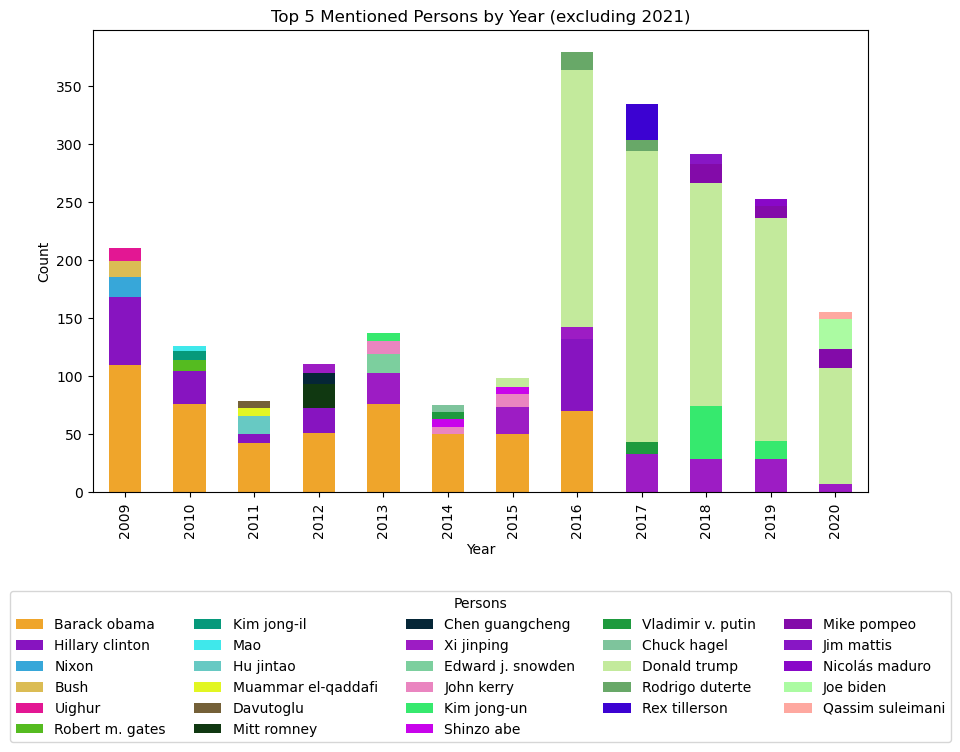

In [128]:
import matplotlib.pyplot as plt
from matplotlib import colors
import hashlib
color_map = {person: f'#{hashlib.md5(person.encode("utf-8")).hexdigest()[:6]}' for person in df_results.columns}
ax = df_results.astype(int).plot(kind='bar', stacked=True, figsize=(10, 6), color=[color_map[person] for person in df_results.columns])
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title(f'Top 5 Mentioned Persons by Year (excluding {excluded_year})')
legend_labels = [person.capitalize() for person in df_results.columns]
ax.legend(legend_labels, title='Persons', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=5)
plt.show()